Importing `numpy`, `pandas` and `matplotlib`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Importing `ofcandle` module from `pyorderedfuzzy.ofcandles`

In [2]:
from pyorderedfuzzy.ofcandles import ofcandle

Data loading

In [3]:
df = pd.read_csv('KGHM.prn')
print('rows:',len(df))
df.head()

rows: 1258859


,Name,Date,Time,Open,High,Low,Close,Volume,Oi
0,KGHM,20001117,1001,26.3,26.3,26.3,26.3,11932,0
1,KGHM,20001117,1004,26.3,26.3,26.3,26.3,20288,0
2,KGHM,20001117,1010,26.2,26.2,26.2,26.2,9,0
3,KGHM,20001117,1012,26.3,26.3,26.3,26.3,10000,0
4,KGHM,20001117,1015,26.3,26.3,26.3,26.3,500,0


Transformation to the daily period

In [4]:
dic = {'Date': [], 'Time': [], 'Close': [], 'Volume': []}
df_days = df.groupby('Date')
print('days:',len(df_days))
for day, df_day in df_days:
    dic['Date'].append(day)
    dic['Time'].append(np.array(df_day['Time']))
    dic['Close'].append(np.array(df_day['Close']))
    dic['Volume'].append(np.array(df_day['Volume']))
df_days = pd.DataFrame(dic)
print(len(df_days))
df_days.head()

days: 4080
4080


,Close,Date,Time,Volume
0,"[26.3, 26.3, 26.2, 26.3, 26.3, 26.3, 26.3, 26....",20001117,"[1001, 1004, 1010, 1012, 1015, 1025, 1030, 103...","[11932, 20288, 9, 10000, 500, 500, 15, 60, 425..."
1,"[26.1, 26.4, 26.3, 26.8, 26.7, 26.8, 26.8, 26....",20001120,"[1001, 1004, 1013, 1019, 1020, 1021, 1022, 102...","[10515, 100, 100, 30000, 1049, 4000, 8885, 109..."
2,"[26.5, 26.5, 26.5, 26.6, 26.6, 26.6, 26.5, 26....",20001121,"[1001, 1002, 1004, 1015, 1016, 1020, 1023, 102...","[2991, 100, 200, 1000, 205, 500, 400, 262, 257..."
3,"[26.1, 26.2, 26.2, 26.2, 26.1, 26.1, 26.1, 26....",20001122,"[1001, 1008, 1009, 1013, 1015, 1017, 1020, 103...","[2550, 50, 9, 40, 10, 100, 200, 1000, 190, 100..."
4,"[26.1, 26.1, 26.1, 26.1, 26.2, 26.1, 26.1, 26....",20001123,"[1001, 1005, 1009, 1015, 1020, 1023, 1037, 103...","[1330, 190, 21, 110, 100, 4500, 300, 2000, 200..."


Preparing data for `ofcandle`

In [5]:
day = 20001120
idx = pd.Index(df_days['Date']).get_loc(day)
data = df_days.iloc[idx]
price = data['Close']
volume = data['Volume']
spread = np.zeros(len(price))

ctype = 'linear'        # candle type: 'linear', 'gauss', 'empirical'
wtype = 'volume'        # weight type: 'clear', 'volume', 'lt', 'et', or combination e.g. ['volume', 'et']
param_s = 'mix_average' # params S1, S2 type: 'average', 'lw_average', 'ew_average', 'mix_average'
param_c = 'none'        # params C1, C2 type: 'none', 'std', 'volatility'
dim = 11                # int

can_data = {'price': price, 'volume': volume, 'spread': spread}
can_params = {'wtype': wtype, 'param_s': param_s, 'param_c': param_c, 'dim': dim}
print('candle data:', can_data)
print('candle type:', ctype)
print('candle params:', can_params)

candle data: {'price': array([ 26.1,  26.4,  26.3,  26.8,  26.7,  26.8,  26.8,  26.8,  26.8,
        26.7,  26.8,  26.7,  26.7,  26.7,  26.6,  26.3,  26.2,  26.4,
        26.4,  26.4,  26.4,  26.4,  26.4,  26.3,  26.4,  26.4,  26.4,
        26.4,  26.4,  26.4,  26.4,  26.5,  26.5,  26.5,  26.8,  26.8,
        26.4,  26.7,  26.4,  26.4,  26.6,  26.6,  26.6,  26.5,  26.5,
        26.4,  26.8,  26.4,  26.5,  26.5,  26.5,  26.5,  26.5,  26.5,
        26.5,  26.5,  26.5,  26.5,  26.5,  26.5,  26.5,  26.6,  26.6,
        26.5,  26.5,  26.6,  26.5,  26.5,  26.5,  26.6,  26.6,  26.5,
        26.5,  26.5,  26.5,  26.5,  26.5,  26.4,  26.4,  26.4,  26.4,
        26.3,  26.4,  26.4,  26.5,  26.4,  26.4,  26.5,  26.4,  26.5,
        26.3,  26.3,  26.4,  26.4,  26.3,  26.3,  26.4]), 'volume': array([10515,   100,   100, 30000,  1049,  4000,  8885,  1090,    25,
        1700,  1010,  1000,  1500,  1500,  2000,   301,   810,   460,
          46,   300,    50,   500,  1644,   520,     6,   494,    12,

Trapezoidal OFCandle

param_s: (26.599087974412932, 26.625786163522012)
param_c: (0.0, 0.0)
param_ab: (58.871698113208083, 51.377465756755427)


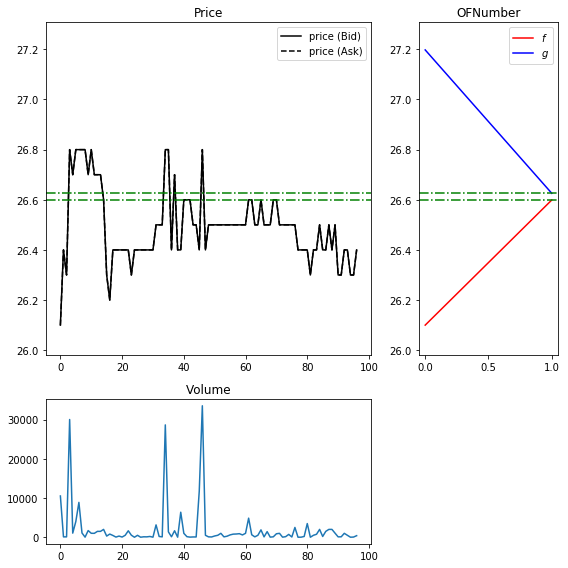

In [6]:
can_trap = ofcandle.OFCandle(ctype, can_data, can_params)

print('param_s:', can_trap.param_s)
print('param_c:', can_trap.param_c)
print('param_ab:', can_trap.param_ab)

# plot ofcandle with data 
can_trap.plot_candle()

Gaussian OFCandle

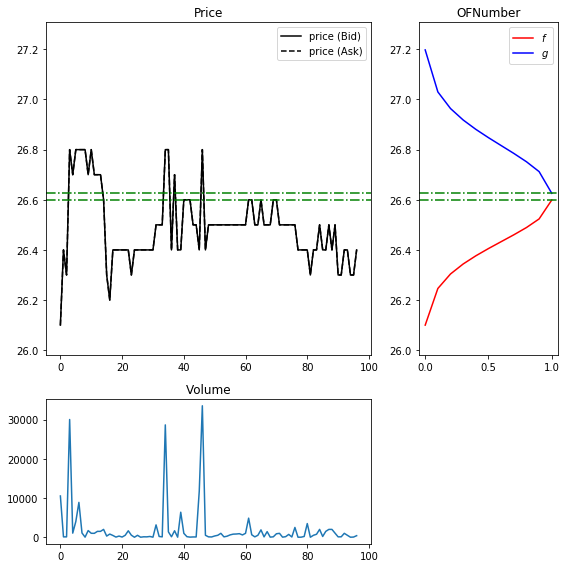

In [7]:
ctype = 'gauss'
can_gauss = ofcandle.OFCandle(ctype, can_data, can_params)

# plot ofcandle with data 
can_gauss.plot_candle()

Empirical OFCandle

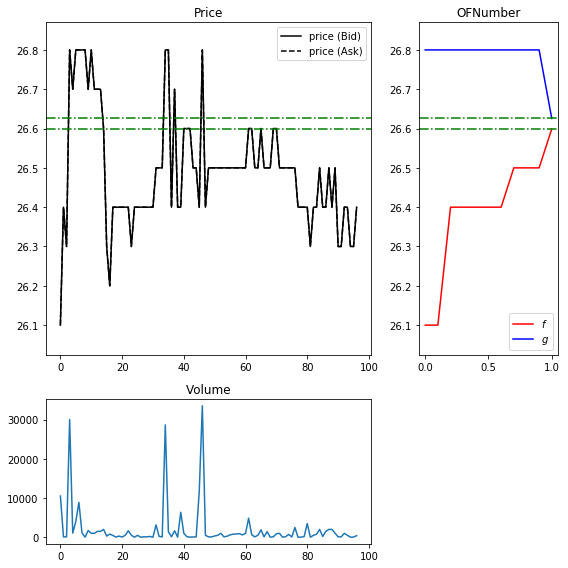

In [8]:
ctype = 'empirical'
can_emp = ofcandle.OFCandle(ctype, can_data, can_params)

# plot ofcandle with data 
can_emp.plot_candle()

OFCandle to OFNumber

can_gauss: <class 'pyorderedfuzzy.ofcandles.ofcandle.OFCandle'>
ofn_gauss: <class 'pyorderedfuzzy.ofnumbers.ofnumber.OFNumber'>


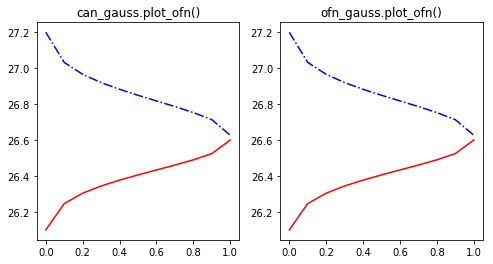

In [9]:
ofn_gauss = can_gauss.to_ofn()
print('can_gauss:', type(can_gauss))
print('ofn_gauss:', type(ofn_gauss))

# plot
options_f = {'c':'r', 'ls': '-'}
options_g = {'c':'b', 'ls': '-.'}
fig = plt.figure('OFNumber', figsize=(8,4))
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax2 = plt.subplot2grid((1, 2), (0, 1))
can_gauss.plot_ofn(ax1, kwargs_f=options_f, kwargs_g=options_g)
ax1.set_title('can_gauss.plot_ofn()')
ofn_gauss.plot_ofn(ax2, kwargs_f=options_f, kwargs_g=options_g)
ax2.set_title('ofn_gauss.plot_ofn()')
plt.show()